# Problem statement- The following a dataset for covid-19 cases recorded in india started 2020-01-30 till 2020-09-19



# The problem is to forecast the cases for next two months


# The scope of study- This study gives us an opportunity to be prepared for the cases prior and arrange the medical conditions accordingly 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime

In [2]:
def parser(x):
    return pd.datetime.strptime(x,"%d-%m-%Y")
df=pd.read_csv("india.csv",parse_dates=["Date_reported"],index_col="Date_reported",date_parser=parser)

In [3]:
df.head()

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-30,IN,India,SEARO,5,5,0,0
2020-01-31,IN,India,SEARO,0,5,0,0
2020-02-01,IN,India,SEARO,0,5,0,0
2020-02-02,IN,India,SEARO,1,6,0,0
2020-02-03,IN,India,SEARO,1,7,0,0


In [4]:
df

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-30,IN,India,SEARO,5,5,0,0
2020-01-31,IN,India,SEARO,0,5,0,0
2020-02-01,IN,India,SEARO,0,5,0,0
2020-02-02,IN,India,SEARO,1,6,0,0
2020-02-03,IN,India,SEARO,1,7,0,0
...,...,...,...,...,...,...,...
2020-09-15,IN,India,SEARO,83809,4930236,1054,80776
2020-09-16,IN,India,SEARO,90123,5020359,1290,82066
2020-09-17,IN,India,SEARO,97894,5118253,1132,83198


In [5]:
df.columns

Index([' Country_code', ' Country', ' WHO_region', ' New_cases',
       ' Cumulative_cases', ' New_deaths', ' Cumulative_deaths'],
      dtype='object')

# As the problem statement wants to forecast the values for new cases only that makes New_cases the considerable feature 

In [6]:
dff=df.drop([ ' Country_code', ' Country', ' WHO_region', ' Cumulative_cases', ' New_deaths', ' Cumulative_deaths'],axis=1)

In [7]:
dff.head()

,New_cases
Date_reported,
2020-01-30,5
2020-01-31,0
2020-02-01,0
2020-02-02,1
2020-02-03,1


In [8]:
time1 = dff[" New_cases"]
time1.head()

Date_reported
2020-01-30    5
2020-01-31    0
2020-02-01    0
2020-02-02    1
2020-02-03    1
Name:  New_cases, dtype: int64

In [9]:
time1.head()

Date_reported
2020-01-30    5
2020-01-31    0
2020-02-01    0
2020-02-02    1
2020-02-03    1
Name:  New_cases, dtype: int64

In [10]:
time1.tail()

Date_reported
2020-09-15    83809
2020-09-16    90123
2020-09-17    97894
2020-09-18    96424
2020-09-19    93337
Name:  New_cases, dtype: int64

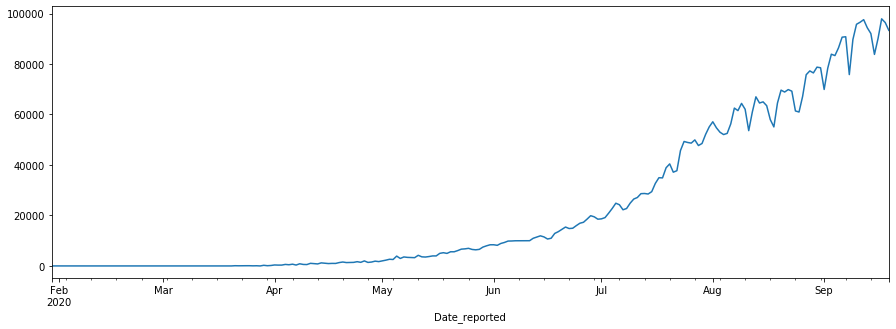

In [11]:
time1.plot(kind="line",figsize=(15,5))
plt.show()

In [12]:
train=time1[0:174] 
test=time1[174:]

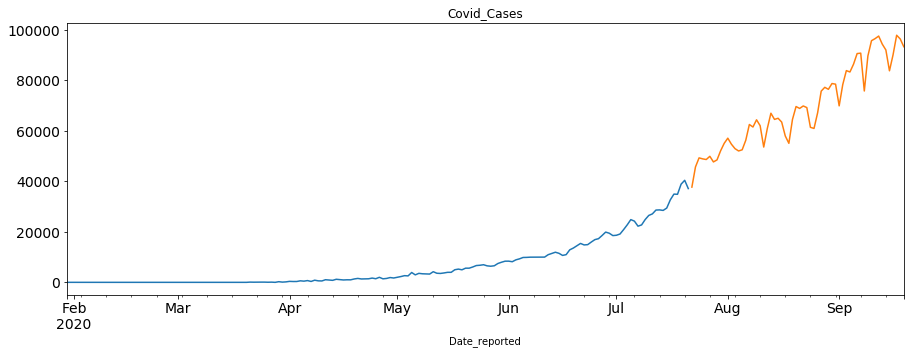

In [13]:
train.plot(figsize=(15,5), title= 'Covid_Cases', fontsize=14)
test.plot(figsize=(15,5), title= 'Covid_Cases', fontsize=14)
plt.show()

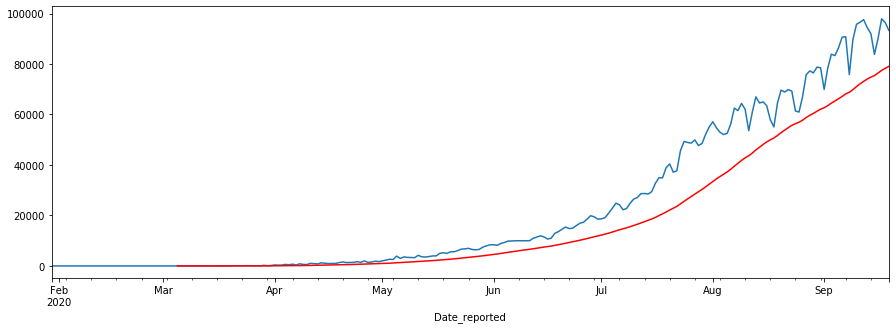

In [14]:
#moving_avg = pd.rolling_mean(time1,12)

moving_avg =time1.rolling(36).mean()
time1.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()

# Decomposing the data to see the compponents of the data 

C:\Users\parva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


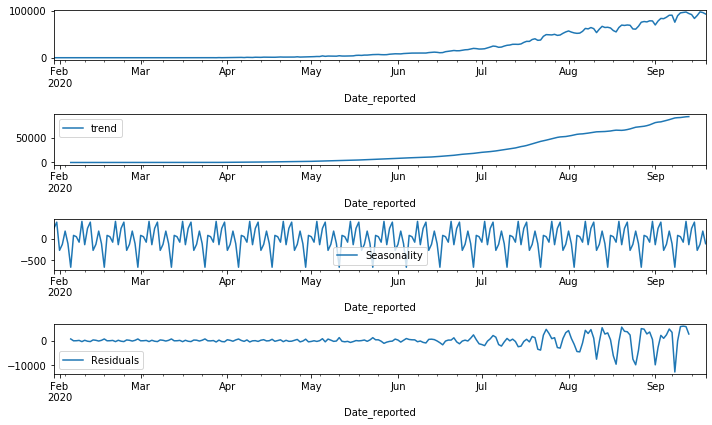

In [15]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time1,model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Exponential Smoothing

In [16]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
hwes = ExponentialSmoothing(train , seasonal_periods=12 ,trend='add', seasonal="additive").fit()
hwes.summary()

C:\Users\parva\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,174
Model:,ExponentialSmoothing,SSE,83832792.013
Optimized:,True,AIC,2308.839
Trend:,Additive,BIC,2359.384
Seasonal:,Additive,AICC,2313.252
Seasonal Periods:,12,Date:,"Thu, 01 Oct 2020"
Box-Cox:,False,Time:,01:59:22
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9999000,alpha,True
smoothing_slope,0.0526316,beta,True


In [19]:
hwes1 = hwes.forecast(60)
#print(hwes1)

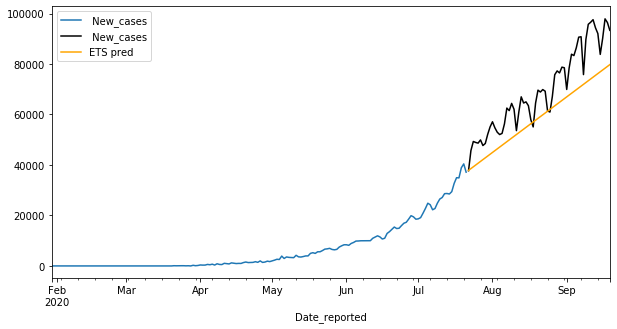

In [20]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [21]:
print(mean_absolute_error(y_true=test,y_pred=hwes1))

10506.963112851105


In [22]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
    #Determing rolling statistics
    rolmean=pd.core.window.Rolling(timeseries, window=12).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=12).std()



    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

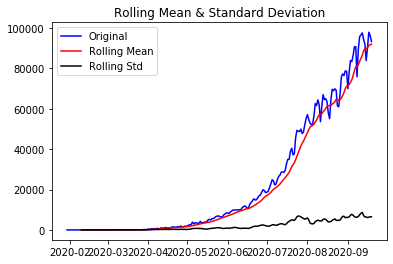

Results of Dickey-Fuller Test:
Test Statistic                   0.281721
p-value                          0.976490
#Lags Used                      15.000000
Number of Observations Used    218.000000
Critical Value (1%)             -3.460708
Critical Value (5%)             -2.874891
Critical Value (10%)            -2.573886
dtype: float64


In [23]:
test_stationarity(time1)

In [24]:
#series is not stationary as mean is increasing even though the std.
#pvalue> 0.05 hence H0 accepted that the series is nonstationary

In [25]:
diff1=train.diff()
diff1=diff1.dropna()

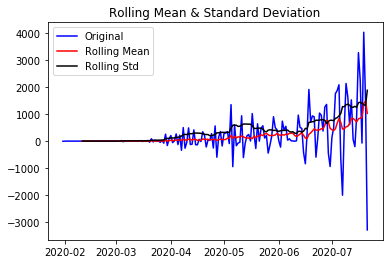

Results of Dickey-Fuller Test:
Test Statistic                   3.340998
p-value                          1.000000
#Lags Used                      14.000000
Number of Observations Used    158.000000
Critical Value (1%)             -3.472431
Critical Value (5%)             -2.880013
Critical Value (10%)            -2.576619
dtype: float64


In [26]:
test_stationarity(diff1)

In [27]:
diff2=diff1.diff()
diff2=diff2.dropna()

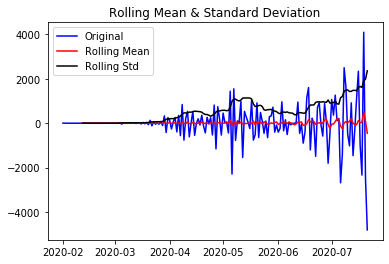

Results of Dickey-Fuller Test:
Test Statistic                -7.833682e+00
p-value                        6.196065e-12
#Lags Used                     1.300000e+01
Number of Observations Used    1.580000e+02
Critical Value (1%)           -3.472431e+00
Critical Value (5%)           -2.880013e+00
Critical Value (10%)          -2.576619e+00
dtype: float64


In [28]:
test_stationarity(diff2)

In [29]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

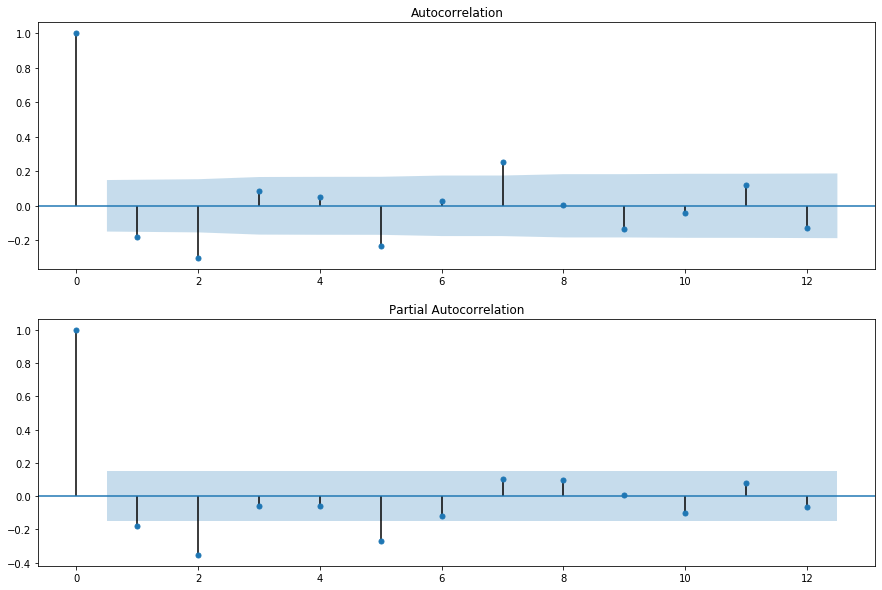

In [30]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff2, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diff2, ax=pyplot.gca(),lags=12)
pyplot.show()

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=2722.316, Time=0.03 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=2681.345, Time=0.46 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.63 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=2720.472, Time=0.02 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=2661.521, Time=1.71 sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=inf, Time=2.62 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(0,2,0)(2,1,0)[12]             : AIC=2668.577, Time=1.08 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=2628.875, Time=2.32 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=2654.786, Time=0.63 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=2606.893, Time=3.47 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=1.55 sec
 ARIMA(2,2,0)(2,1,2)[12]             : AIC=2608.891, Time=4.41 sec
 ARIMA(2,2,0)(1,1,2)[12]             : AIC=inf, Time=2.85 sec
 ARIMA(3,2,0)(2,1,1)[12]             : AIC=2

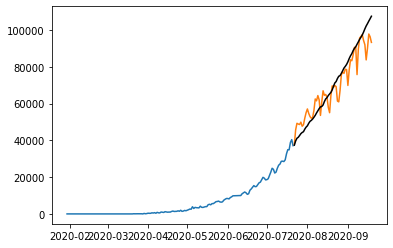

In [56]:
from pmdarima import auto_arima
model = auto_arima(train, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, start_Q=0, max_P=2, max_Q=2, seasonal=True,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True
                          )
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [57]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  174
Model:             SARIMAX(2, 2, 1)x(2, 1, 1, 12)   Log Likelihood               -1276.981
Date:                            Thu, 01 Oct 2020   AIC                           2567.961
Time:                                    02:06:25   BIC                           2589.488
Sample:                                         0   HQIC                          2576.703
                                            - 174                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0225      0.081      0.277      0.782      -0.137       0.182
ar.L2         -0.3586      0.097   

In [58]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

5360.159843206105


In [60]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [61]:
model = ARIMA(train, order=(2,2,1))
model_fit=model.fit(disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D2. New_cases   No. Observations:                  172
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -1357.963
Method:                       css-mle   S.D. of innovations            643.750
Date:                Thu, 01 Oct 2020   AIC                           2725.926
Time:                        02:07:10   BIC                           2741.663
Sample:                    02-01-2020   HQIC                          2732.311
                         - 07-21-2020                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.4684      2.319      2.358      0.018       0.923      10.013
ar.L1.D2. New_cases     0.1532      0.085      1.800      0.072      -0.014       0.320
ar.L2.D2. New_ca

C:\Users\parva\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\parva\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


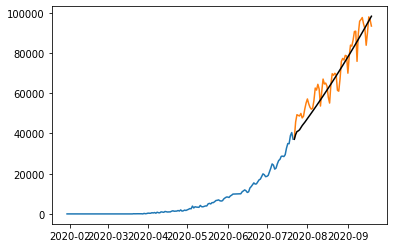

In [62]:
forecast = model_fit.forecast(steps=60)[0]

forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [63]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

4961.036523681333
